In [2]:
# Practial K-means implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
penguins = sns.load_dataset('penguins')
print(penguins.info())
print(penguins.head())
print("\nMissing values per column:")
print(penguins.isna().sum())

penguins_clean = penguins.dropna().copy()

print("\nMissing values after cleaning:")
print(penguins_clean.isna().sum())
print(f"Original shape: {penguins.shape}, Cleaned shape: {penguins_clean.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7

In [11]:
# Standardize the data

# Select numeric features
numeric_features = penguins_clean.select_dtypes(include=['float64', 'int64']).copy()

# Standardize the features
scaler = StandardScaler() # scaler ensures that each feature contributes proportionally to its standard deviation
X_scaled = scaler.fit_transform(numeric_features)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features.columns, index=numeric_features.index)

# Display the first few rows of the standardized data
print('Before scaling:')
print(numeric_features.head())
print('\nAfter scaling:')
print(X_scaled_df.head())

# Verify standardization (mean ≈ 0, std ≈ 1)
print("\nMeans:")
print(X_scaled_df.mean())
print("\nStandard deviations:")
print(X_scaled_df.std())



Before scaling:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0

After scaling:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
4       -1.335566       1.085877          -0.569284    -0.941606
5       -0.859415       1.747026          -0.783651    -0.692852

Means:
bill_length_mm       3.840772e-16
bill_depth_mm        6.401286e-16
flipper_length_mm    2.133762e-16
body_mass_g         -1.707010e-16
dtype: float64

Standard deviations:
bill_le

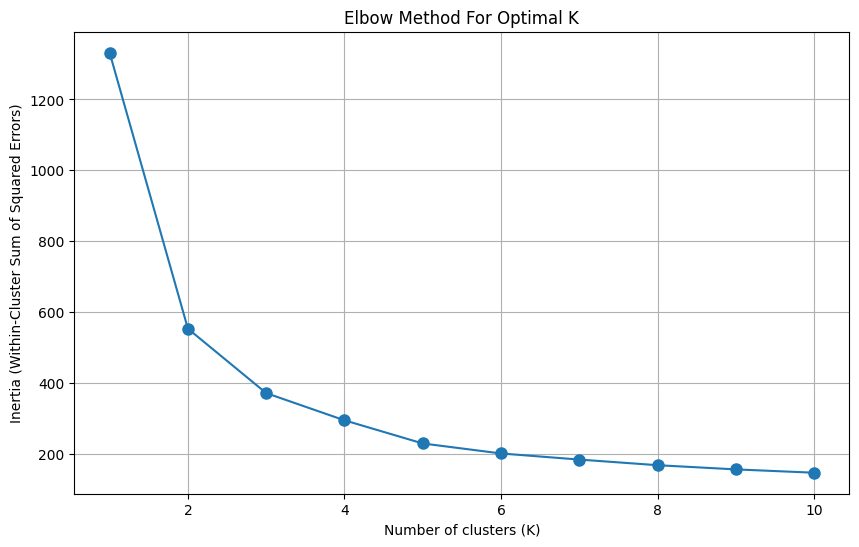

In [12]:
# Determine the optimal K using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    # n_init: number of times the k-means algorithm will be run with different centroid seeds
    # random_state: ensures reproducibility
    # difference between n_clusters and n_init: n_clusters is the number of clusters to form, while n_init is the number of initializations to run the algorithm
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled) # fit the model to the scaled data
    inertia.append(kmeans.inertia_) # inertia is the sum of squared distances of samples to their closest cluster center

# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squared Errors)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()



In [13]:
# Apply K-means with the the chosen K
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels= kmeans.fit_predict(X_scaled) # fit the model to the scaled data and predict the cluster labels

# Add cluster labels to the original dataframe
penguins_clustered = penguins_clean.copy()
penguins_clustered['cluster'] = pd.Series(cluster_labels, index=penguins_clean.index).astype('category')

# Display counts per cluster
print("Observations per cluster:")
print(penguins_clustered['cluster'].value_counts())

Observations per cluster:
cluster
0    129
1    119
2     85
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

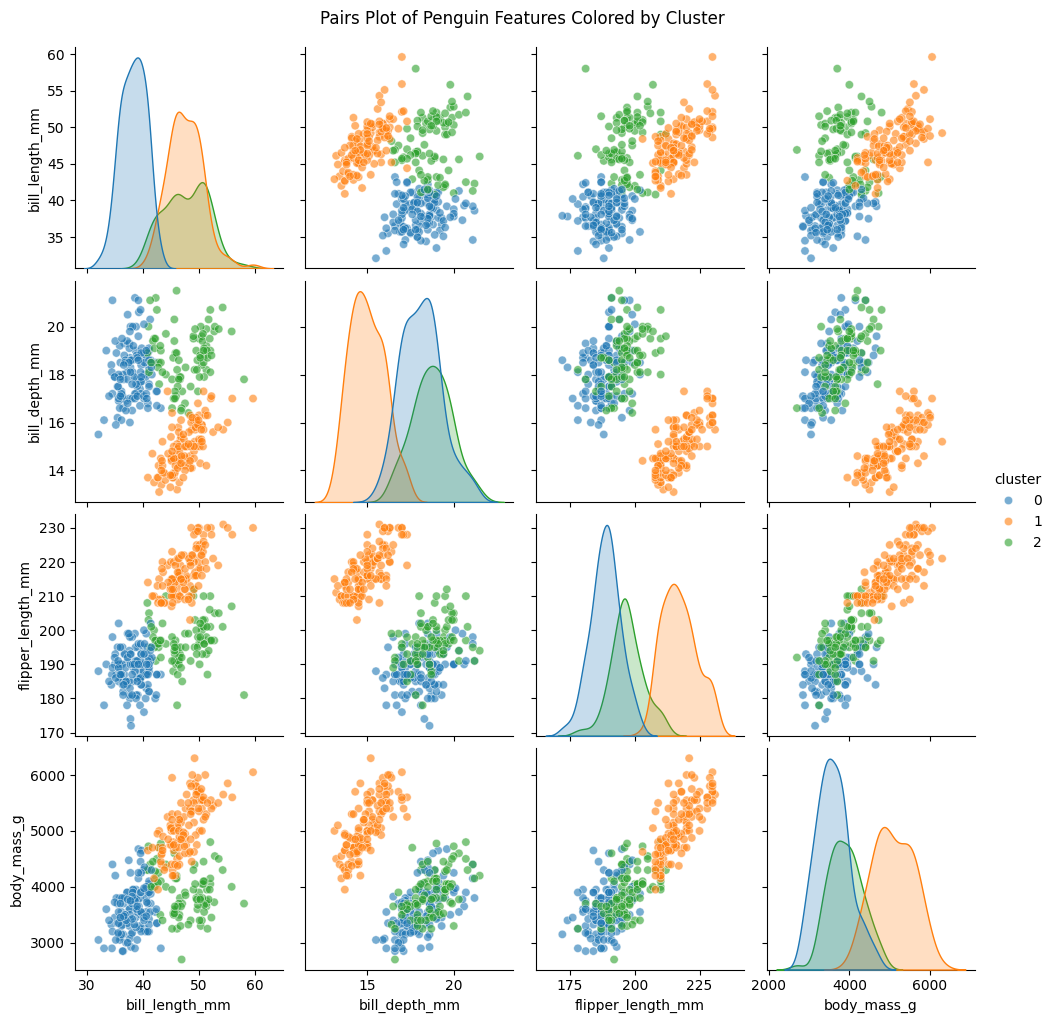

In [17]:
# Visualize the clusters

# Create a paris plot colored by cluster
plt.figure(figsize=(12, 10))
sns.pairplot(penguins_clustered,
             vars=numeric_features.columns,
             hue='cluster',
             diag_kind='kde',
             plot_kws={'alpha': 0.6},
             height=2.5)
plt.suptitle('Pairs Plot of Penguin Features Colored by Cluster', y=1.02)
plt.show()


<Figure size 1200x600 with 0 Axes>

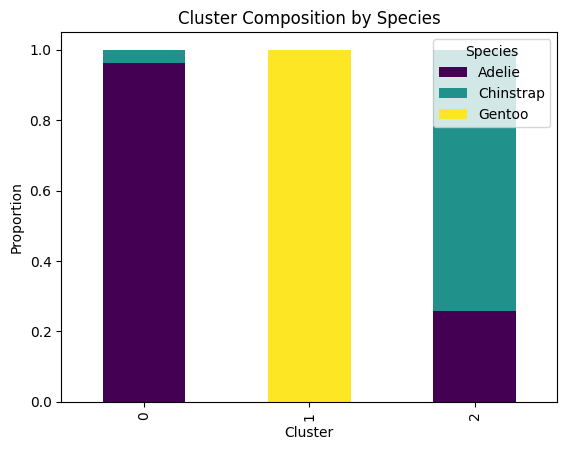

In [18]:
# Compare clusters with species
plt.figure(figsize=(12, 6))
crosstab = pd.crosstab(penguins_clustered['cluster'],
                       penguins_clustered['species'],
                       normalize='index')

crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Cluster Composition by Species')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Species')
plt.show()

In [19]:
# PCA Foundations

In [26]:
# Implementing PCA
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=pca_result,
    columns=['PC1', 'PC2'],
    index=penguins_clean.index
)

# Display the first few rows
print(pca_df.head())

# Check the explained variance ratio
print('\nExplained Variance Ration:')
print(pca.explained_variance_ratio_)
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2f}")


        PC1       PC2
0 -1.853593  0.032069
1 -1.316254 -0.443527
2 -1.376605 -0.161230
4 -1.885288 -0.012351
5 -1.919981  0.817598

Explained Variance Ration:
[0.68633893 0.19452929]
Total Explained Variance: 0.88


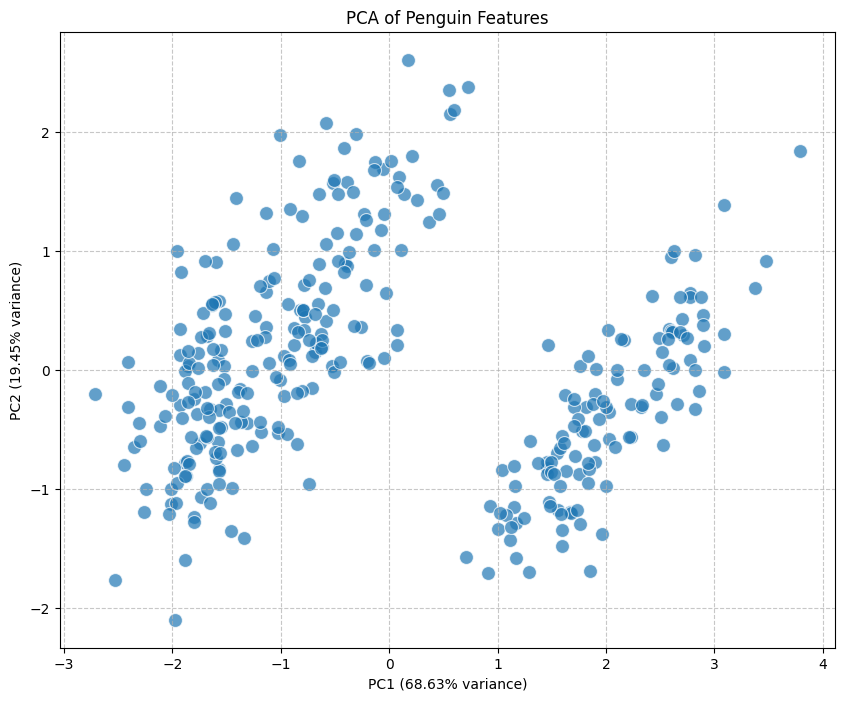

In [27]:
# Visualizing PCA results
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA of Penguin Features')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

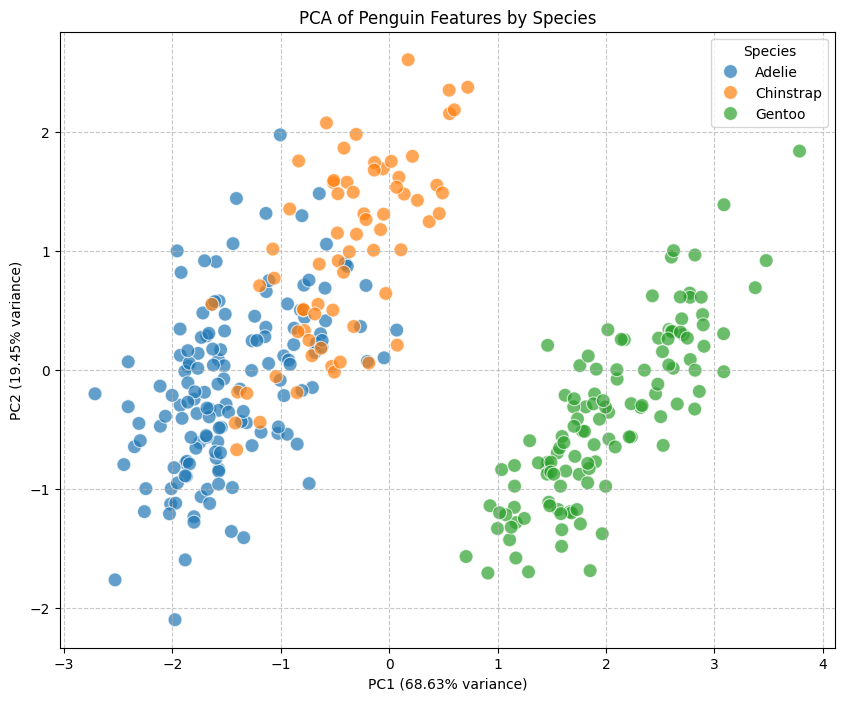

In [28]:
# Color by species to see if PCA captures the species differences
pca_df_with_species = pca_df.copy()
pca_df_with_species['species'] = penguins_clean['species']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df_with_species, s=100, alpha=0.7)
plt.title('PCA of Penguin Features by Species')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Species')
plt.show()

Component loadings:
                        PC1       PC2
bill_length_mm     0.453753  0.600195
bill_depth_mm     -0.399047  0.796170
flipper_length_mm  0.576825  0.005788
body_mass_g        0.549675  0.076464


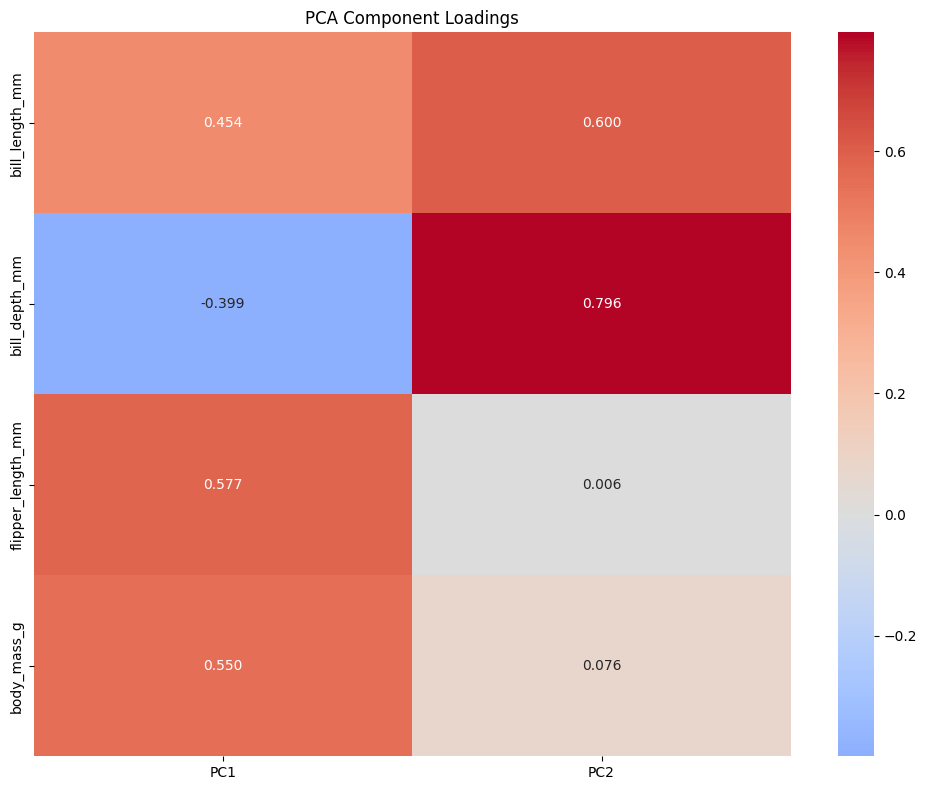

In [29]:
# Get the loadings (coefficients) of each feature for each principal component
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=numeric_features.columns
)

# Display the loadings
print("Component loadings:")
print(loadings)

# Visualize the loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()